In [2]:
import io
import spb
import numpy as np
import sympy as sp
import scipy as sc
import sympy.plotting as smp
from math import *
from random import *
from sympy import S, real_roots
from sympy.abc import x, y

конвертация матрицы в для отправки

In [3]:
matrix = np.random.randint(-3,10,size=(2,3))
dic = {"data": matrix.tolist()}
dic

{'data': [[1, 0, -2], [-2, 6, 5]]}

конвертация массива в матрицу

In [4]:
np.asmatrix(dic['data'])

matrix([[ 1,  0, -2],
        [-2,  6,  5]])

определитель

In [5]:
matrix = np.random.randint(-3,10,size=(3,3))
np.around(np.linalg.det(matrix), 1 ), np.linalg.det(matrix)

(-104.0, -103.99999999999999)

транспонирование

In [6]:
matrix.transpose()

array([[ 7,  0,  3],
       [ 2, -1,  3],
       [ 7,  6,  5]])

Ранг матрицы

In [7]:
np.linalg.matrix_rank(matrix)

3

обратная матрица

In [8]:
a = np.random.randint(-9, 10, size=(3,3))
while (np.linalg.det(a) == 0):
  a = np.random.randint(-9, 10, size=(3,3))
a

array([[-3, -2,  5],
       [-4,  5, -1],
       [ 2, -9, -6]])

In [9]:
InvA = np.around(np.linalg.inv(a), 1)
InvA

array([[-0.1, -0.2, -0.1],
       [-0.1,  0. , -0.1],
       [ 0.1, -0.1, -0.1]])

Сумма матриц

In [10]:
matrix = np.random.randint(10, size=(4, 4))
row_count = matrix.shape[0]
columns_count = matrix.shape[1]

row_index = np.random.randint(0,row_count, size=(1,1))[0][0]
column_index = np.random.randint(0,columns_count, size=(1,1))[0][0]
answer = matrix[row_index][column_index]
answer

2

Умножение числа на матрицу

In [11]:
matrix = np.random.randint(10, size=(4, 4))
number = np.random.randint(1, 10, size=(1,1))[0][0]

answer = matrix * number
answer

array([[56, 24, 24,  0],
       [40, 48, 24, 16],
       [ 8,  0, 56, 24],
       [40, 32, 24,  8]])

Умножение матриц

In [12]:
matrix1 = np.random.randint(-9, 10, size=(2,2))
matrix2 = np.random.randint(-9, 10, size=(2,2))


matrix1,matrix2,np.dot(matrix1, matrix2)

(array([[ 6, -4],
        [ 5,  6]]),
 array([[ 3, -7],
        [ 2, -5]]),
 array([[ 10, -22],
        [ 27, -65]]))

Генерация невырожденной матрицы

In [13]:
def generateNonsingularMatrix(min_value, max_value, rows_count, columns_count):
  a = np.random.randint(min_value, max_value, size=(rows_count, columns_count))
  while (np.linalg.det(a) == 0):
    a = np.random.randint(min_value, max_value, size=(rows_count, columns_count))

  return a

Уравнение с определителем

In [14]:
def GenerateDeterminantEquationTask():
  matrix = generateNonsingularMatrix(-9, 10, 3, 3)
  determinant = np.around(np.linalg.det(matrix))

  row_count = matrix.shape[0]
  columns_count = matrix.shape[1]

  row_index = np.random.randint(0,row_count, size=(1,1))[0][0]
  column_index = np.random.randint(0,columns_count, size=(1,1))[0][0]
  random_elem = matrix[row_index][column_index]

  new_matrix = np.where(matrix == random_elem, "x", matrix)
  task = "Какое значение должно стоять на месте x, чтобы соблюдалось равенство?" 

  dic = {
    "task":task,
    "data": {"matrix": new_matrix.tolist(), "determinant": determinant},
    "answer": int(random_elem)}
  return dic

print(GenerateDeterminantEquationTask())

{'task': 'Какое значение должно стоять на месте x, чтобы соблюдалось равенство?', 'data': {'matrix': [['-7', '7', '6'], ['4', '4', '-1'], ['1', '1', 'x']], 'determinant': 154.0}, 'answer': -3}


Матричные уравнения

In [38]:
def GenerateSolveMatrixEquationTask():
  switch = randint(0, 1)

  if switch == 0:
    a = generateNonsingularMatrix(-9, 10, 3, 3)
    b = generateNonsingularMatrix(-9, 10, 3, 3)
    a1 = np.linalg.inv(a)
    answer = np.around(np.dot(a1, b), 3)
    task = "Решите уравнение вида A*X = B. Ответ округлите до 3х знаков после запятой"
  else:
    a = generateNonsingularMatrix(-9, 10, 3, 3)
    b = generateNonsingularMatrix(-9, 10, 3, 3)
    a1 = np.linalg.inv(a)
    answer = np.around(np.dot(b,a1), 3)
    task = "Решите уравнение вида X*A = B. Ответ округлите до 3х знаков после запятой"
    
  dic = {
  "task":task,
  "data": {"A": a.tolist(), "B": b.tolist()},
  "answer": answer.tolist()}
  return dic

print(GenerateSolveMatrixEquationTask())

{'task': 'Решите уравнение вида A*X = B. Ответ округлите до 3х знаков после запятой', 'data': {'A': [[0, -7, 9], [0, 4, -2], [-3, 5, -7]], 'B': [[4, -1, 8], [9, 9, 9], [-2, 7, 7]]}, 'answer': [[-0.97, -2.606, -5.061], [4.045, 3.591, 4.409], [3.591, 2.682, 4.318]]}


In [16]:
def GenerateSolveDoubleMatrixEquationTask():
  task = "Решите уравнение вида A·X·B = C. Ответ округлите до 3х знаков после запятой"
  a = generateNonsingularMatrix(-9, 10, 3, 3)
  b = generateNonsingularMatrix(-9, 10, 3, 3)
  c = generateNonsingularMatrix(-9, 10, 3, 3)
  a1 = np.linalg.inv(a)
  b1 = np.linalg.inv(b)
  x = np.dot(a1,c)
  answer = np.around(np.dot(x, b1), 3)
  dic = {
  "task":task,
  "data": {"A": a.tolist(), "B": b.tolist(), "C": c.tolist()},
  "answer": answer.tolist()}
  return dic

print(GenerateSolveDoubleMatrixEquationTask())

{'task': 'Решите уравнение вида A·X·B = C. Ответ округлите до 3х знаков после запятой', 'data': {'A': [[-4, -6, 3], [0, -1, -9], [-2, -2, -1]], 'B': [[6, -4, 5], [6, -1, 4], [-3, -4, -7]], 'C': [[5, 4, 4], [-1, 2, 4], [-1, 5, 9]]}, 'answer': [[-1.471, 2.847, 1.809], [1.069, -2.011, -1.044], [-0.186, 0.355, 0.206]]}


Ранг матрицы

In [17]:
def GenerateFindMatrixRankTask():
  switch = np.random.randint(0, 2, size=(1,1))[0][0]
  task = "Определите ранг матрицы"

  if switch == 0:
    matrix = np.random.randint(-9, 10, size=(3,3))
    answer = np.linalg.matrix_rank(matrix)
      
  else:
    matrix = np.random.randint(-9, 10, size=(2,3))
    factor1, factor2 = 0, 0
    while factor1 == 0 or factor2 == 0:
        factor1 = np.random.randint(-3, 4, size=(1,1))[0][0]
        factor2 = np.random.randint(-3, 4, size=(1,1))[0][0]

    matrix = np.vstack([matrix, factor1 * matrix[0] + factor2*matrix[1]])
    np.random.shuffle(matrix)
    answer = np.linalg.matrix_rank(matrix)
  
  dic = {
  "task":task,
  "data": matrix.tolist(),
  "answer": answer.item()}
  return dic

print(GenerateFindMatrixRankTask())

{'task': 'Определите ранг матрицы', 'data': [[-9, 2, 8], [-2, -9, 4], [2, 8, -7]], 'answer': 3}


Система линейных уравнений

In [18]:
def generateSLU(x_count, equation_count, min_value, max_value):
  a = np.random.randint(min_value, max_value, size=(equation_count, x_count))
  while (np.linalg.det(a) == 0):
    a = np.random.randint(min_value, max_value, size=(equation_count, x_count))

  b = np.random.randint(min_value, max_value, size=(x_count, 1))
  x = np.random.randint(1, size=(x_count, 1))

  while((a.dot(x) != b).any()):
    a = np.random.randint(min_value, max_value, size=(equation_count, x_count))
    while (np.linalg.det(a) == 0):
      a = np.random.randint(min_value, max_value, size=(equation_count, x_count))

    b = np.random.randint(min_value, max_value, size=(x_count, 1))
    x = np.linalg.solve(a, b)
  return (a,b,x)

print(generateSLU(3,3,-5, 21))

(array([[ 7,  4,  1],
       [ 5,  1, -3],
       [ 8,  1, -3]]), array([[16],
       [18],
       [19]]), array([[ 0.33333333],
       [ 4.41025641],
       [-3.97435897]]))


In [19]:
def GenerateSolveLinearEquationTask():
  a, b, x = generateSLU(3, 3, -5, 21)
  first_equation = f"{a[0][0]}*x + {a[0][1]}*y + {a[0][2]}*z = {b[0].item()}"
  second_equation = f"{a[1][0]}*x + {a[1][1]}*y + {a[1][2]}*z = {b[1].item()}"
  third_equation = f"{a[2][0]}*x + {a[2][1]}*y + {a[2][2]}*z = {b[2].item()}"
  task = "Решите систему линейных уравнений. Ответ округлите до 3х знаков после запятой"  
  answer = np.around(x,1).tolist()
  dic = {
  "task":task,
  "data": {"first_equation": first_equation, "second_equation": second_equation, "third_equation" : third_equation},
  "answer": answer}
  return dic

print(GenerateSolveLinearEquationTask())

{'task': 'Решите систему линейных уравнений. Ответ округлите до 3х знаков после запятой', 'data': {'first_equation': '8*x + 12*y + 15*z = 10', 'second_equation': '10*x + 12*y + 3*z = 4', 'third_equation': '3*x + 7*y + 6*z = 4'}, 'answer': [[0.2], [0.0], [0.5]]}


Скалярное произведение векторов

In [20]:
def GenerateScalarVectorMultiplicationTask():
  a = np.random.randint(-20, 21, size=(1,3))[0]
  b = np.random.randint(-20, 21, size=(1,3))[0]
  task = "Вычислите скалярное произведение векторов A и B."
  answer = a @ b
  dic = {
    "task": task,
    "data": {"A": a.tolist(), "B": b.tolist()},
    "answer": answer}
  return dic

print(GenerateScalarVectorMultiplicationTask())

{'task': 'Вычислите скалярное произведение векторов A и B.', 'data': {'A': [-8, -13, -19], 'B': [8, -18, -6]}, 'answer': 284}


Векторное произведение векторов

In [21]:
def GenerateVectorVectorMultiplicationTask():
  a = np.random.randint(-20, 21, size=(1,3))
  b = np.random.randint(-20, 21, size=(1,3))

  combined = np.vstack([a, b])
  xy = combined[:2, :2]
  yz = combined[:2, 1:3]
  xz = combined[:2, [0, 2]]
  answer = np.array([int(np.linalg.det(yz)), -1 * int(np.linalg.det(xz)), int(np.linalg.det(xy))])
  task = "Вычислите векторное произведение векторов А и В."
  dic = {
    "task": task,
    "data": {"A": a.tolist()[0], "B": b.tolist()[0]},
    "answer": answer.tolist()}
  return dic

print(GenerateVectorVectorMultiplicationTask())


{'task': 'Вычислите векторное произведение векторов А и В.', 'data': {'A': [-3, 3, 15], 'B': [8, 0, -19]}, 'answer': [-57, 62, -23]}


Длина Вектора

In [22]:

def GenerateVectorVectorMultiplicationModuleTask():
  temp = GenerateVectorVectorMultiplicationTask()
  a = temp["data"]["A"]
  b = temp["data"]["B"]
  vector = np.array(temp["answer"])
  answer = np.around(sqrt(vector[0]**2 + vector[1]**2 + vector[2]**2 ), 1)
  task = "Вычислите длинну вектора, полученную в результате векторного произведения A и B"
  dic = {
    "task": task,
    "data": {"A": a, "B": b},
    "answer": answer.tolist()}
  return dic


print(GenerateVectorVectorMultiplicationModuleTask())

{'task': 'Вычислите длинну вектора, полученную в результате векторного произведения A и B', 'data': {'A': [-11, 3, -20], 'B': [11, -6, -19]}, 'answer': 465.3}


Смешанное произведение векторов

In [23]:
def GenerateMixedVectorMultiplicationTask():
  a = np.random.randint(-20, 21, size=(1,3))
  b = np.random.randint(-20, 21, size=(1,3))
  c = np.random.randint(-20, 21, size=(1,3))

  combined = np.vstack([a, b, c])
  answer = np.around(np.linalg.det(combined))
  task = "Вычислите смешанное произведение векторов A, B и C"
  dic = {
    "task": task,
    "data": {"A": a.tolist()[0], "B": b.tolist()[0], "C": c.tolist()[0]},
    "answer": answer}
  return dic

print(GenerateMixedVectorMultiplicationTask())


{'task': 'Вычислите смешанное произведение векторов A, B и C', 'data': {'A': [19, 4, 20], 'B': [-20, -16, -8], 'C': [1, 3, 13]}, 'answer': -3368.0}


Коллинеарность векторов

In [24]:
def GenerateIsCollinearVectorsTask():
  switch = np.random.randint(0, 2, size=(1,1))[0][0]

  if switch == 0:
    a = np.random.randint(-20, 21, size=(1,3))[0]
    b = np.random.randint(-20, 21, size=(1,3))[0]
  else:
    fraction = np.random.randint(-3, 5, size=(1,1))[0][0]
    a = np.random.randint(-20, 21, size=(1,3))[0]
    b = fraction * a

  first,second,third = a[0]/b[0],a[1]/b[1],a[2]/b[2]

  task = "Являются ли вектор A и вектор B коллинеарными? В ответе указать Да или Нет."
  ansver = "Да" if np.equal(first,second) and np.equal(first,third) else "Нет"

  dic = {
    "task": task,
    "data": {"A": a.tolist(), "B": b.tolist()},
    "ansver": ansver}

  return dic

print(GenerateIsCollinearVectorsTask())

{'task': 'Являются ли вектор A и вектор B коллинеарными? В ответе указать Да или Нет.', 'data': {'A': [16, 13, -15], 'B': [-9, -4, -13]}, 'ansver': 'Нет'}


Компланарность векторов

In [25]:
def generateSingularMatrix(min_value, max_value, rows_count, columns_count):
  a = np.random.randint(min_value, max_value, size=(rows_count, columns_count))
  while (np.linalg.det(a) != 0):
    a = np.random.randint(min_value, max_value, size=(rows_count, columns_count))
  return a

print(generateSingularMatrix(1, 10, 3, 3))

[[6 6 6]
 [9 6 5]
 [6 6 6]]


In [26]:
def GenerateIsComplanarVectorsTask():
  switch = np.random.randint(0, 2, size=(1,1))[0][0]

  if switch == 0:
    data = generateNonsingularMatrix(-20, 21, 3, 3)
  else:
    data = generateSingularMatrix(-20, 21, 3, 3)
  
  task = "Являются ли векторы A B и C компланарными? В ответе указать Да или Нет."
  answer = "Да" if switch != 0 else "Нет"

  dic = {
    "task": task,
    "data": {"A": data[0].tolist(), "B":data[1].tolist(), "C": data[2].tolist()},
    "answer": answer}
  
  return dic

print(GenerateIsComplanarVectorsTask())
    

{'task': 'Являются ли векторы A B и C компланарными? В ответе указать Да или Нет.', 'data': {'A': [-9, 2, 15], 'B': [2, -5, 9], 'C': [4, 13, -20]}, 'answer': 'Нет'}


Поиск уравнения прямой

In [27]:
def GenerateFindLineEquationByPointsTask():
    A1,A2 = randint(-9, 9),randint(-9, 9)
    B1,B2 = randint(-9, 9),randint(-9, 9)

    A, B = sp.Point(A1, A2), sp.Point(B1, B2)
    L = sp.Line(A, B)

    task = f"Составить уравнение прямой, проходящей через две точки:  A({A1},{A2})  и  B({B1},{B2})"
    answer = L.equation()

    dic = {
    "task": task,
    "data": {}, #Нужно ли тут что - то на фронт возвращать? все данные уже в задаче.
    "answer": answer}
    return dic

print(GenerateFindLineEquationByPointsTask())

{'task': 'Составить уравнение прямой, проходящей через две точки:  A(-3,3)  и  B(-2,7)', 'data': {}, 'answer': -4*x + y - 15}


Поиск уравнения паралельного вектора, проходящего через точку.

In [11]:
def GenerateFindParalelLineEquationTask():
    A1,A2 = randint(-9, 9),randint(-9, 9)
    A = sp.Point(A1,A2)
    B1,B2 = randint(-9, 9),randint(-9, 9)
    L1 = sp.Line((0, 0), (B1, B2))

    L2 = L1.parallel_line(A)
    task = f"Известно, что прямая  L  проходит через начало координат и точку  B({B1},{B2}). Записать уравнение прямой, проходящей через точку  A({A1},{A2})  параллельно прямой  L"
    answer = L2.equation()

    dic = {
        "task": task,
        "data": {}, #Нужно ли тут что - то на фронт возвращать? все данные уже в таске.
        "answer": answer}
    
    return dic

print(GenerateFindParalelLineEquationTask())

{'task': 'Известно, что прямая  L  проходит через начало координат и точку  B(-4,-6). Записать уравнение прямой, проходящей через точку  A(-3,-4)  параллельно прямой  L', 'data': {}, 'answer': 6*x - 4*y + 2}


In [29]:
def GenerateFindParalelLineEquationByPointsTask():
    A1,A2 = randint(-9, 9),randint(-9, 9)
    B1,B2 = randint(-9, 9),randint(-9, 9)
    C1,C2 = randint(-9, 9),randint(-9, 9)
    A = sp.Point(A1,A2)
    L1 = sp.Line((B1, B2), (C1, C2))

    L2 = L1.parallel_line(A)
    task = f"Составить уравнение прямой, проходящей через точку А({A1},{A2}), параллельную прямой BC, если B({B1},{B2}), C({C1},{C2})"
    answer = L2.equation()

    dic = {
    "task": task,
    "data": {}, #Нужно ли тут что - то на фронт возвращать? все данные уже в задаче.
    "answer": answer}

    return dic
    
print(GenerateFindParalelLineEquationByPointsTask())

{'task': 'Составить уравнение прямой, проходящей через точку А(8,1), параллельную прямой BC, если B(4,-9), C(-3,6)', 'data': {}, 'answer': -15*x - 7*y + 127}


Поиск точки пересечения прямых

In [30]:
def GenerateFindCrossPointOfTwoLinesTask():
    A1,A2 = randint(-9, 9),randint(-9, 9)
    B1,B2 = randint(-9, 9),randint(-9, 9)
    C1,C2 = randint(-9, 9),randint(-9, 9)
    D1,D2 = randint(-9, 9),randint(-9, 9)

    L1 = sp.Line((A1, A2), (B1, B2))
    L2 = sp.Line((C1, C2), (D1, D2))

    task = f"Найти точку пересечения прямых L1 и L2, если известно, что прямая L1 проходит через точки А({A1},{A2}) и B({B1},{B2}), а прямая L2 проходит через точки C({C1},{C2}) и D({D1},{D2})"
    answer = list(L1.intersection(L2)[0].coordinates)

    dic = {
    "task": task,
    "data": {}, #Нужно ли тут что - то на фронт возвращать? все данные уже в задаче.
    "answer": answer}
    return dic


print(GenerateFindCrossPointOfTwoLinesTask())

{'task': 'Найти точку пересечения прямых L1 и L2, если известно, что прямая L1 проходит через точки А(9,8) и B(9,-4), а прямая L2 проходит через точки C(-4,-4) и D(9,-9)', 'data': {}, 'answer': [9, -9]}


Поиск расстояния от точки до прямой

In [31]:
def GenerateFindDicstanceFromLineToPointTask():
    A1,A2 = randint(-9, 9),randint(-9, 9)
    B1,B2 = randint(-9, 9),randint(-9, 9)
    C1,C2 = randint(-9, 9),randint(-9, 9)

    C = sp.Point(C1, C2)
    L1 = sp.Line((A1, A2), (B1, B2))

    task = f"Известно, что прямая L проходит через точки A({A1},{A2}) и B({B1},{B2}). Из точки C({C1},{C2}) на прямую L опущен перпендикуляр, который касается её в точке D. Определить длину отрезка CD. Пример формы ответа: 3*sqrt(26)/13"
    answer = L1.perpendicular_segment(C).length

    dic = {
    "task": task,
    "data": {}, #Нужно ли тут что - то на фронт возвращать? все данные уже в задаче.
    "answer": answer}
    return dic

print(GenerateFindDicstanceFromLineToPointTask())

{'task': 'Известно, что прямая L проходит через точки A(0,-6) и B(2,5). Из точки C(5,0) на прямую L опущен перпендикуляр, который касается её в точке D. Определить длину отрезка CD. Пример формы ответа: 3*sqrt(26)/13', 'data': {}, 'answer': 43*sqrt(5)/25}


Уравнение плоскости по трем точкам

In [32]:
def GenerateFindPlaneEquationByThreePointsTask():
    A1,A2,A3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)
    B1,B2,B3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)
    C1,C2,C3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)

    alpha = sp.Plane(sp.Point3D(A1, A2, A3), sp.Point3D(B1, B2, B3), sp.Point3D(C1, C2, C3))

    task = f"Записать уравнение плоскости, проходящей через точки A({A1},{A2},{A3}), B({B1},{B2},{B3}), C({C1},{C2},{C3}). Пример формы записи ответа: 38*x - 136*y - 126*z - 574"
    answer = alpha.equation()

    dic = {
    "task": task,
    "data": {}, #Нужно ли тут что - то на фронт возвращать? все данные уже в задаче.
    "answer": answer}
    return dic

print(GenerateFindPlaneEquationByThreePointsTask())

{'task': 'Записать уравнение плоскости, проходящей через точки A(0,5,0), B(8,-8,8), C(9,-8,-9). Пример формы записи ответа: 38*x - 136*y - 126*z - 574', 'data': {}, 'answer': 221*x + 144*y + 13*z - 720}


Уравнение прямой по нормальному вектору и точке

In [33]:
def GenerateFindPlaneEquationByPointAndNormalVector():
    A1,A2,A3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)
    B1,B2,B3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)

    alpha = sp.Plane(sp.Point3D(A1, A2, A3), normal_vector =(B1, B2, B3))

    task = f"Записать уравнение плоскости a, которая проходит через точку M({A1},{A2},{A3}) и перпендикулярна вектору n =({B1},{B2},{B3}). Пример записи ответа: -3*x - 8*y - 8*z + 85"
    answer = alpha.equation()

    dic = {
    "task": task,
    "data": {}, #Нужно ли тут что - то на фронт возвращать? все данные уже в задаче.
    "answer": answer}
    return dic

print(GenerateFindPlaneEquationByPointAndNormalVector())

{'task': 'Записать уравнение плоскости a, которая проходит через точку M(-7,1,7) и перпендикулярна вектору n =(3,0,2). Пример записи ответа: -3*x - 8*y - 8*z + 85', 'data': {}, 'answer': 3*x + 2*z + 7}


Уравнение параллельной плоскости

In [34]:
def GenerateFindParallelPlaneEquationTask():
  A1,A2,A3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)
  B1,B2,B3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)
  P1,P2,P3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)

  task = f"Плоскость α проходит через точку M({A1},{A2},{A3}) и перепендикулярна вектору n =({B1},{B2},{B3}). Найти уравнение плоскости β, параллельной α и проходящей через точку P({P1},{P2},{P3})"
  
  alpha = sp.Plane(sp.Point3D(A1, A2, A3), normal_vector =(B1, B2, B3))

  parallelPlane = alpha.parallel_plane(sp.Point3D(P1,P2,P3))
  answer = parallelPlane.equation()

  dic = {
    "task": task,
    "data": {}, #Нужно ли тут что - то на фронт возвращать? все данные уже в задаче.
    "answer": answer}
  
  return dic

print(GenerateFindParallelPlaneEquationTask())

{'task': 'Плоскость α проходит через точку M(7,8,-3) и перепендикулярна вектору n =(7,-1,-1). Найти уравнение плоскости β, параллельной α и проходящей через точку P(3,-4,5)', 'data': {}, 'answer': 7*x - y - z - 20}


Уравнение перпендикулярной плоскости

In [35]:
def GenerateFindOrtPlaneEquationTask():
    A1,A2,A3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)
    B1,B2,B3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)
    P1,P2,P3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)
    N1,N2,N3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)

    task = f"Плоскость α имеет нормальный вектор n =({N1},{N2},{N3}) и проходит через точку P({P1},{P2},{P3}). Найти уравнение плоскости, перпендикулярной α и проходящей через точки A({A1},{A2},{A3}) и B({B1},{B2},{B3}))"

    alpha = sp.Plane(sp.Point3D(P1, P2, P3), normal_vector =(N1, N2, N3))
    A,B = sp.Point3D(A1,A2,A3), sp.Point3D(B1,B2,B3)

    ortPlane = alpha.perpendicular_plane(A,B)
    answer = ortPlane.equation()

    dic = {
    "task": task,
    "data": {}, #Нужно ли тут что - то на фронт возвращать? все данные уже в задаче.
    "answer": answer}
    return dic

print(GenerateFindOrtPlaneEquationTask())

{'task': 'Плоскость α имеет нормальный вектор n =(0,-2,5) и проходит через точку P(8,8,-2). Найти уравнение плоскости, перпендикулярной α и проходящей через точки A(5,4,-4) и B(-1,8,4))', 'data': {}, 'answer': 36*x + 30*y + 12*z - 252}


Проекция точки на прямую

In [36]:
def GeneratePointProjectionOnLineTask():
    A1,A2,A3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)
    N1,N2,N3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)
    M1,M2,M3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)

    task = f"Известно, что прямая L проходит через точку N({N1},{N2},{N3}) и точку M({M1},{M2},{M3}). Найти координаты проекции точки A({A1},{A2},{A3}) на прямую L"

    A = sp.Point(A1,A2,A3)
    line = sp.Line((N1,N2,N3),(M1,M2,M3))
    answer = line.projection(A).coordinates

    dic = {
    "task": task,
    "data": {}, 
    "answer": answer}
    return dic

print(GeneratePointProjectionOnLineTask())

{'task': 'Известно, что прямая L проходит через точку N(0,1,9) и точку M(2,-9,-5). Найти координаты проекции точки A(-6,7,6) на прямую L', 'data': {}, 'answer': (-1/5, 2, 52/5)}


Проекция точки на плоскость

In [37]:
def GeneratePointProjectionOnPlainTask():
    A1,A2,A3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)
    N1,N2,N3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)
    P1,P2,P3 = randint(-9, 9),randint(-9, 9),randint(-9, 9)

    task = f"Известно, что плоскость α проходит через точку P({P1},{P2},{P3})  и перпендикулярна вектору n =({N1},{N2},{N3}). Найти координаты проекции точки A({A1},{A2},{A3}) на плоскость α"
    
    A = sp.Point(A1, A2, A3)

    alpha = sp.Plane(sp.Point3D(P1, P2, P3), normal_vector =(N1, N2, N3))
    answer = alpha.projection(A).coordinates
    
    dic = {
    "task": task,
    "data": {}, 
    "answer": answer}
    return dic

print(GeneratePointProjectionOnPlainTask())

{'task': 'Известно, что плоскость α проходит через точку P(2,3,8)  и перпендикулярна вектору n =(-7,-6,-7). Найти координаты проекции точки A(-2,2,8) на плоскость α', 'data': {}, 'answer': (-15/67, 236/67, 655/67)}


{'task': '', 'data': {'img': '<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="460.8pt" height="345.6pt" viewBox="0 0 460.8 345.6" xmlns="http://www.w3.org/2000/svg" version="1.1">\n <metadata>\n  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n   <cc:Work>\n    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>\n    <dc:date>2024-05-29T21:56:01.077117</dc:date>\n    <dc:format>image/svg+xml</dc:format>\n    <dc:creator>\n     <cc:Agent>\n      <dc:title>Matplotlib v3.6.0, https://matplotlib.org/</dc:title>\n     </cc:Agent>\n    </dc:creator>\n   </cc:Work>\n  </rdf:RDF>\n </metadata>\n <defs>\n  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>\n </defs>\n <g id="figure_1">\n 

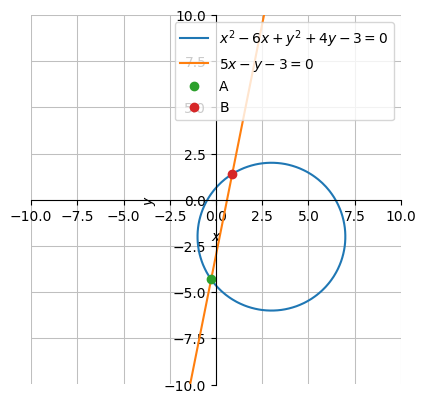

In [181]:
def GenerateFindCircleAndLineCrossPointsTask():

    result = []
    while len(result) == 0:
        a, c = randint(*choice([(2,4),(-4,-2)])), randint(*choice([(2,4),(-4,-2)]))
        r = randint(2,4)
        A, C = 1, 1
        B = -2*a
        D = -2*c
        Q = a**2 + c**2 - r**2
        x, y = sp.symbols("x y", real=True)
    
        circle = sp.Eq(A*x**2 + C*y**2 + B*x + D*y + Q, 0)

        lx0, lx1, ly1 = randint(-5, 5), randint(-5, 5), 1
        
        line = sp.Eq(lx1*x - ly1*y - lx0, 0)

        result = sp.solve([circle, line], [x, y], dict=True)

    #print('координаты точки пересчения А: ', result[0][x], result[0][y])
    #print('координаты точки пересчения B: ', result[1][x], result[1][y])

    ranges = (x, -10, 10), (y, -10, 10)
    
    plot_base = spb.graphics(
        spb.implicit_2d(circle, *ranges),
        spb.implicit_2d(line, *ranges),
        rendering_kw={"marker": "ro", "markerfacecolor": None},
        backend=spb.MB,
        axis_center=(0.0, 0.0),
        #legend=False,
        show=False,
        aspect = "equal",
    )
    plot_anotation = spb.plot_list(
        ([result[0][x]], [result[0][y]], "A"),
        (result[1][x], result[1][y], "B"),
        rendering_kw={"marker": "o", "markerfacecolor": None},
        scatter=True, show=False
    )
    
    plot = plot_base + plot_anotation
    #plot.show()

    buffer = io.StringIO()
    plot.save(buffer, format = "svg")


    task = f""
    answer = result

    dic = {
    "task": task,
    "data": {'img': buffer.getvalue()}, 
    "answer": answer}
    return dic

print(GenerateFindCircleAndLineCrossPointsTask())

{'task': '', 'data': {'img': '<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="460.8pt" height="345.6pt" viewBox="0 0 460.8 345.6" xmlns="http://www.w3.org/2000/svg" version="1.1">\n <metadata>\n  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n   <cc:Work>\n    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>\n    <dc:date>2024-05-29T22:16:08.852518</dc:date>\n    <dc:format>image/svg+xml</dc:format>\n    <dc:creator>\n     <cc:Agent>\n      <dc:title>Matplotlib v3.6.0, https://matplotlib.org/</dc:title>\n     </cc:Agent>\n    </dc:creator>\n   </cc:Work>\n  </rdf:RDF>\n </metadata>\n <defs>\n  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>\n </defs>\n <g id="figure_1">\n 

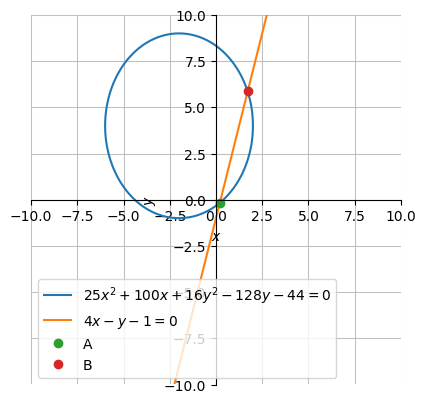

In [239]:
def GenerateFindEllipseAndLineCrossPointsTask():
    result = []
    while len(result) != 2:
        a, c = randint(*choice([(2,4),(-4,-2)])), randint(*choice([(2,4),(-4,-2)]))
        if a == c:
            c+=1

        b, d = randint(*choice([(2,5),(-5,-2)])), randint(*choice([(2,5),(-5,-2)]))
        if b == d:
            d+=1
            
        A = d**2
        B = -2 * a * (d**2)
        C = b**2
        D = -2 * c * (b**2)
        Q = d**2 * a**2 + c**2 * b**2 - b**2 * d**2
        
        x, y = sp.symbols("x y", real=True)
    
        circle = sp.Eq(A*x**2 + C*y**2 + B*x + D*y + Q, 0)

        lx0, lx1, ly1 = randint(-5, 5), randint(-5, 5), 1
        
        line = sp.Eq(lx1*x - ly1*y - lx0, 0)

        result = sp.solve([circle, line], [x, y], dict=True)

    #print('координаты точки пересчения А: ', result[0][x], result[0][y])
    #print('координаты точки пересчения B: ', result[1][x], result[1][y])

    ranges = (x, -10, 10), (y, -10, 10)
    
    plot_base = spb.graphics(
        spb.implicit_2d(circle, *ranges),
        spb.implicit_2d(line, *ranges),
        rendering_kw={"marker": "ro", "markerfacecolor": None},
        backend=spb.MB,
        axis_center=(0.0, 0.0),
        #legend=False,
        show=False,
        aspect = "equal",
    )
    plot_anotation = spb.plot_list(
        ([result[0][x]], [result[0][y]], "A"),
        (result[1][x], result[1][y], "B"),
        rendering_kw={"marker": "o", "markerfacecolor": None},
        scatter=True, show=False
    )
    
    plot = plot_base + plot_anotation
    #plot.show()

    buffer = io.StringIO()
    plot.save(buffer, format = "svg")

    task = f""
    answer = result

    dic = {
    "task": task,
    "data": {'img': buffer.getvalue()}, 
    "answer": answer}
    return dic

print(GenerateFindEllipseAndLineCrossPointsTask())

{'task': '', 'data': {'img': '<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="460.8pt" height="345.6pt" viewBox="0 0 460.8 345.6" xmlns="http://www.w3.org/2000/svg" version="1.1">\n <metadata>\n  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n   <cc:Work>\n    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>\n    <dc:date>2024-06-11T13:15:28.185364</dc:date>\n    <dc:format>image/svg+xml</dc:format>\n    <dc:creator>\n     <cc:Agent>\n      <dc:title>Matplotlib v3.6.0, https://matplotlib.org/</dc:title>\n     </cc:Agent>\n    </dc:creator>\n   </cc:Work>\n  </rdf:RDF>\n </metadata>\n <defs>\n  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>\n </defs>\n <g id="figure_1">\n 

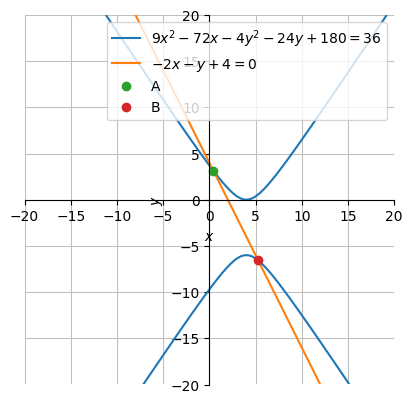

In [3]:
def GenerateFindHiperbolaAndLineCrossPointsTask():
    result = []
    while len(result) != 2:
        a, b = randint(*choice([(2,4),(-4,-2)])), randint(*choice([(2,4),(-4,-2)]))
        x0, y0 = randint(*choice([(2,5),(-5,-2)])), randint(*choice([(2,5),(-5,-2)]))
        x, y = sp.symbols("x y", real=True)

        hiperbola = sp.Eq(b**2*x**2 - 2*x*x0*b**2 + x0**2*b**2 - a**2*y**2 - 2*y*y0*a**2 + a**2*y0**2, a**2*b**2)
        lx0, lx1, ly1 = randint(-5, 5), randint(-5, 5), 1
        
        line = sp.Eq(lx1*x - ly1*y - lx0, 0)

        result = sp.solve([hiperbola, line], [x, y], dict=True)

    #print('координаты точки пересчения А: ', result[0][x], result[0][y])
    #print('координаты точки пересчения B: ', result[1][x], result[1][y])

    ranges = (x, -20, 20), (y, -20, 20)
    
    plot_base = spb.graphics(
        spb.implicit_2d(hiperbola, *ranges),
        spb.implicit_2d(line, *ranges),
        rendering_kw={"marker": "ro", "markerfacecolor": None},
        backend=spb.MB,
        axis_center=(0.0, 0.0),
        #legend=False,
        show=False,
        aspect = "equal",
    )
    plot_anotation = spb.plot_list(
        ([result[0][x]], [result[0][y]], "A"),
        (result[1][x], result[1][y], "B"),
        rendering_kw={"marker": "o", "markerfacecolor": None},
        scatter=True, show=False
    )
    
    plot = plot_base + plot_anotation
    #plot.show()

    buffer = io.StringIO()
    plot.save(buffer, format = "svg")

    task = f""
    answer = result

    dic = {
    "task": task,
    "data": {'img': buffer.getvalue()}, 
    "answer": answer}
    return dic

print(GenerateFindHiperbolaAndLineCrossPointsTask())

{'task': '', 'data': {'img': '<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="460.8pt" height="345.6pt" viewBox="0 0 460.8 345.6" xmlns="http://www.w3.org/2000/svg" version="1.1">\n <metadata>\n  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n   <cc:Work>\n    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>\n    <dc:date>2024-06-06T14:18:21.234772</dc:date>\n    <dc:format>image/svg+xml</dc:format>\n    <dc:creator>\n     <cc:Agent>\n      <dc:title>Matplotlib v3.6.0, https://matplotlib.org/</dc:title>\n     </cc:Agent>\n    </dc:creator>\n   </cc:Work>\n  </rdf:RDF>\n </metadata>\n <defs>\n  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>\n </defs>\n <g id="figure_1">\n 

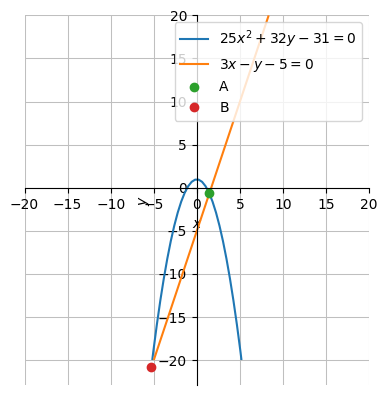

In [5]:
def GenerateFindParabolaAndLineCrossPointsTask():
    result = []
    while len(result) != 2:
        a, c = randint(*choice([(2,4),(-4,-2)])), randint(*choice([(2,4),(-4,-2)]))
        if a == c:
            c+=1

        b, d = randint(*choice([(2,5),(-5,-2)])), randint(*choice([(2,5),(-5,-2)]))
        if b == d:
            d+=1
            
        A = d**2
        B = -2 * a * (d**2)
        C = b**2
        D = -2 * c * (b**2)
        Q = d**2 * a**2 + c**2 * b**2 - b**2 * d**2
        
        x, y = sp.symbols("x y", real=True)

        circle = sp.Eq(A*x**2 + C*y**2 + B*x + D*y + Q, 0)
        parabola = sp.Eq(A*x**2 + 0*y**2 + 2*C*y + Q, 0)
        lx0, lx1, ly1 = randint(-5, 5), randint(-5, 5), 1
        
        line = sp.Eq(lx1*x - ly1*y - lx0, 0)

        result = sp.solve([parabola, line], [x, y], dict=True)

    #print('координаты точки пересчения А: ', result[0][x], result[0][y])
    #print('координаты точки пересчения B: ', result[1][x], result[1][y])

    ranges = (x, -20, 20), (y, -20, 20)
    
    plot_base = spb.graphics(
        spb.implicit_2d(parabola, *ranges),
        spb.implicit_2d(line, *ranges),
        rendering_kw={"marker": "ro", "markerfacecolor": None},
        backend=spb.MB,
        axis_center=(0.0, 0.0),
        #legend=False,
        show=False,
        aspect = "equal",
    )
    plot_anotation = spb.plot_list(
        ([result[0][x]], [result[0][y]], "A"),
        (result[1][x], result[1][y], "B"),
        rendering_kw={"marker": "o", "markerfacecolor": None},
        scatter=True, show=False
    )
    
    plot = plot_base + plot_anotation
    #plot.show()

    buffer = io.StringIO()
    plot.save(buffer, format = "svg")

    task = f""
    answer = result

    dic = {
    "task": task,
    "data": {'img': buffer.getvalue()}, 
    "answer": answer}
    return dic

print(GenerateFindParabolaAndLineCrossPointsTask())